# Imports
**Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get the Data

In [2]:
car = pd.read_csv("Cardetails.csv")

**Check the head of car, and check out its info() and isnull methods.**

In [3]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


# Data Cleaning

**Taking the count of Null/NaN in each column of dataframe**

In [5]:
car.isnull().sum().sort_values(ascending = False)

torque           222
seats            221
engine           221
mileage          221
max_power        215
owner              0
transmission       0
seller_type        0
fuel               0
km_driven          0
selling_price      0
year               0
name               0
dtype: int64

In [6]:
car[car.isna().any(axis=1)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


In [7]:
car.isnull().sum().sum()

1100

In [8]:
car.notnull().sum().sum()

104564

Percentage of missing values is very less compared to the whole dataset.

# Handling missing values

**Exploring/Dealing with the columns that contain empty/null values**

In [9]:
# making new data frame with dropped NA values
car_new = car.dropna(axis = 0, how ='any')
  
# comparing sizes of data frames
print("Old data frame length:", len(car), "\nNew data frame length:", 
       len(car_new), "\nNumber of rows with at least 1 NA value: ",
       (len(car)-len(car_new)))

Old data frame length: 8128 
New data frame length: 7906 
Number of rows with at least 1 NA value:  222


In [10]:
car_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 864.7+ KB


# Extracting new information

**Splitting the name into two columns : car manufacturer and car model**

In [11]:
# new data frame with split value columns
new = car_new["name"].str.split(" ", n = 1, expand = True)
  
# making separate first name column from new data frame
car_new["Car Manufacturer"]= new[0]
  
# making separate last name column from new data frame
car_new["Car Model"]= new[1]
  
# Dropping old Name columns
car_new.drop(columns =["name"], inplace = True)
  


<ipython-input-11-7e5663b051af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_new["Car Manufacturer"]= new[0]
<ipython-input-11-7e5663b051af>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_new["Car Model"]= new[1]
C:\Users\Anita George\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [12]:
car_new.head(6)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Car Manufacturer,Car Model
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City 2017-2020 EXi
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20 Sportz Diesel
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift VXI BSIII
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,Hyundai,Xcent 1.2 VTVT E Plus


**Splitting the car model into two columns : car model and car model version**

In [13]:
car_new["Car Model Version"] = car_new["Car Model"]

# new data frame with split value columns
new1 = car_new["Car Model"].str.split(" ", n = 1, expand = True)
  
# making separate first name column from new data frame
car_new["Car Model"]= new1[0]
  

  

<ipython-input-13-dfb3f43ac0ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_new["Car Model Version"] = car_new["Car Model"]
<ipython-input-13-dfb3f43ac0ed>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_new["Car Model"]= new1[0]


In [14]:
car_new.head(6)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Car Manufacturer,Car Model,Car Model Version
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,Swift,Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid,Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City,City 2017-2020 EXi
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20,i20 Sportz Diesel
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift,Swift VXI BSIII
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,Hyundai,Xcent,Xcent 1.2 VTVT E Plus


In [15]:
# new data frame with split value columns
car_new["mileage"]= car_new["mileage"].str.split("kmpl", n = 1, expand = True)
car_new["mileage"]= car_new["mileage"].str.split("km/kg", n = 1, expand = True)
car_new["mileage"] = pd.to_numeric(car_new["mileage"])

<ipython-input-15-db63d7592e28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_new["mileage"]= car_new["mileage"].str.split("kmpl", n = 1, expand = True)
<ipython-input-15-db63d7592e28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_new["mileage"]= car_new["mileage"].str.split("km/kg", n = 1, expand = True)
<ipython-input-15-db63d7592e28>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [16]:
car_new["engine"]= car_new["engine"].str.split("CC", n = 1, expand = True)
car_new["engine"] = pd.to_numeric(car_new["engine"])

<ipython-input-16-788862aef1f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_new["engine"]= car_new["engine"].str.split("CC", n = 1, expand = True)
<ipython-input-16-788862aef1f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_new["engine"] = pd.to_numeric(car_new["engine"])


In [17]:
print("Seller type \n",car_new['seller_type'].value_counts())
print("\n")
print("Transmission \n",car_new['transmission'].value_counts())
print("\n")
print("Fuel \n",car_new['fuel'].value_counts())
print("\n")
print("Owner \n",car_new['owner'].value_counts())
print("\n")


Seller type 
 Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: seller_type, dtype: int64


Transmission 
 Manual       6865
Automatic    1041
Name: transmission, dtype: int64


Fuel 
 Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64


Owner 
 First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64




In [18]:
car_new.head(6)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Car Manufacturer,Car Model,Car Model Version
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74 bhp,190Nm@ 2000rpm,5.0,Maruti,Swift,Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid,Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City,City 2017-2020 EXi
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20,i20 Sportz Diesel
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift,Swift VXI BSIII
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86 bhp,113.75nm@ 4000rpm,5.0,Hyundai,Xcent,Xcent 1.2 VTVT E Plus


In [19]:
car_new[car_new['Car Manufacturer'] == 'Maruti'].groupby(['Car Model'])['selling_price'].sum().sort_values(ascending = False)

Car Model
Swift       363046964
Ertiga       98054998
Alto         89415397
Baleno       75701000
Wagon        73849340
Vitara       67133995
Ciaz         49830997
Celerio      25753993
Ritz         22885995
SX4          20150000
Eeco         17653996
S-Cross      16679000
Ignis        14091999
Zen           7739000
Omni          6920998
800           6362700
A-Star        3820999
XL6           3040000
Gypsy         2600000
Dzire         1830000
S-Presso       950000
Esteem         618000
Name: selling_price, dtype: int64

In [20]:
car_new.columns


Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'Car Manufacturer', 'Car Model', 'Car Model Version'],
      dtype='object')

In [21]:
car_new[car_new['Car Manufacturer'] == 'Maruti']['Car Model'].value_counts().sort_values(ascending = False)

Swift       729
Alto        418
Wagon       282
Ertiga      147
Baleno      113
800          93
Vitara       84
Ritz         81
Ciaz         68
Celerio      64
Zen          62
Eeco         55
SX4          48
Omni         39
Ignis        26
S-Cross      19
A-Star       18
Esteem        7
Gypsy         6
XL6           3
Dzire         3
S-Presso      2
Name: Car Model, dtype: int64

# Exploratory Data Analysis

**No of cars (Car Manufacturer) sold in each year**

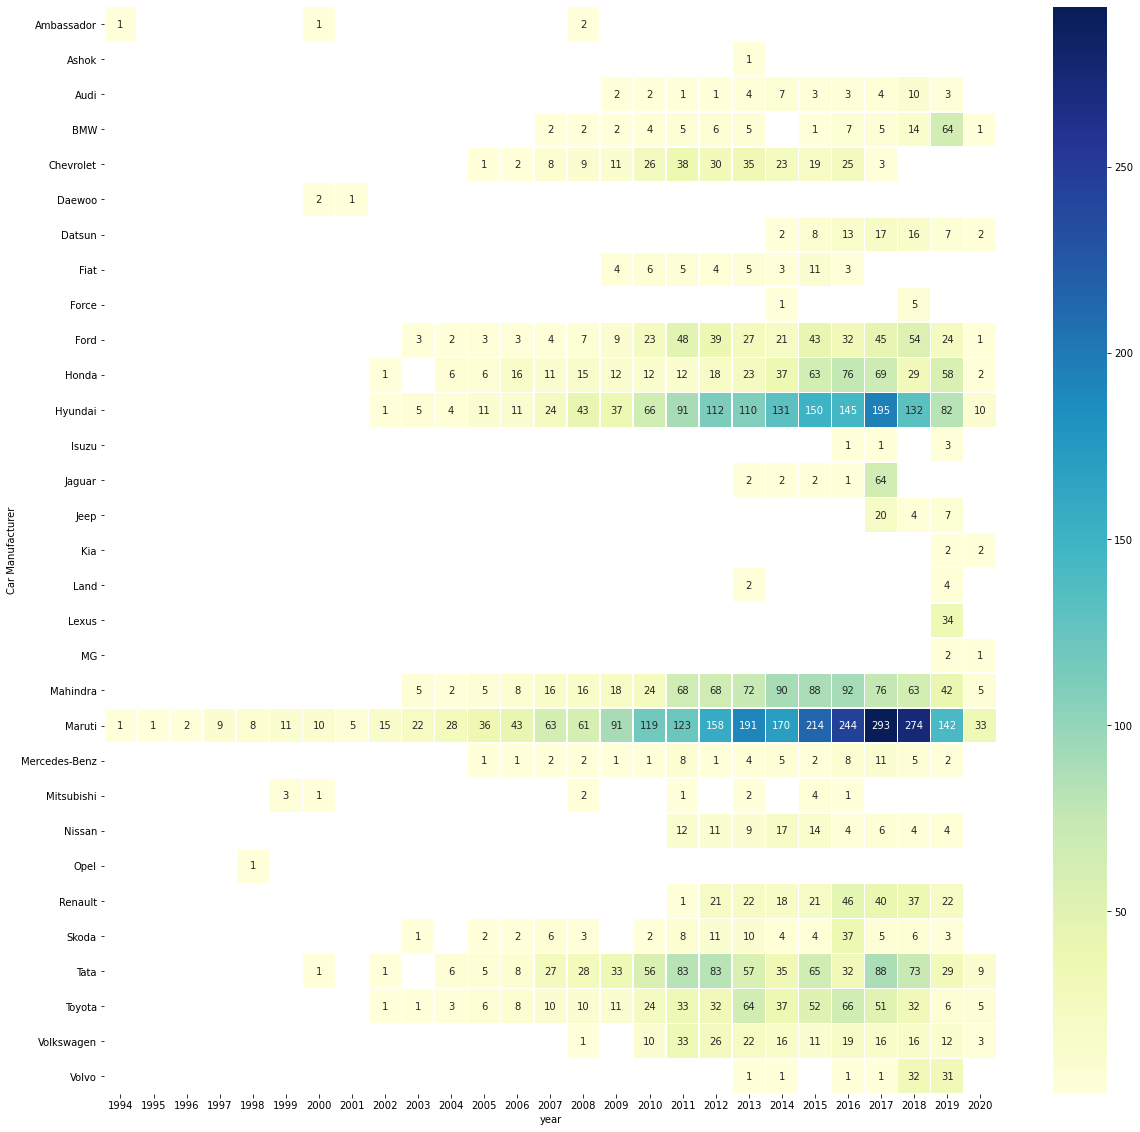

In [22]:
plt.figure(figsize = (20, 20))
sns.heatmap(car_new.groupby(['Car Manufacturer', 'year'])['Car Manufacturer'].count().unstack(), 
            annot = True, fmt = 'g', linewidths=.5, cmap="YlGnBu") 
plt.show()

Here we can see that Maruti was the first choice for people over the years followed by Hyundai

**Top selling car models and car manufacturers over the years**

<AxesSubplot:>

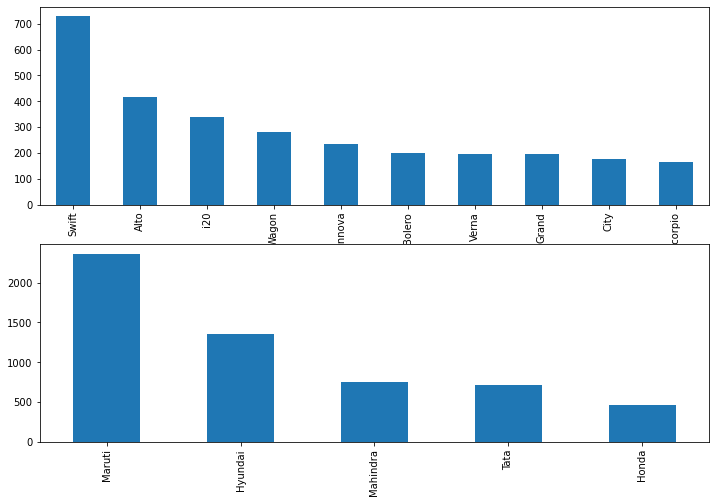

In [23]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

car_new['Car Model'].value_counts().head(10).plot.bar(
    ax=axarr[0]
)

car_new['Car Manufacturer'].value_counts().head(5).plot.bar(
    ax=axarr[1]
)

Top selling models were Swift and Alto from Maruti followed by i20 from Hyundai. We need to explore why these companies are preferred by people.

**Check out the top selling models from Maruti and Hyundai**

<AxesSubplot:>

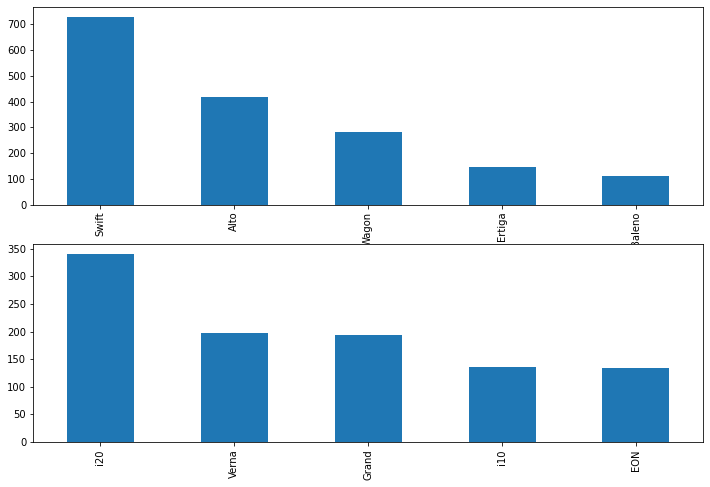

In [24]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

car_new[car_new['Car Manufacturer'] == 'Maruti']['Car Model'].value_counts().nlargest(5).plot.bar(
    ax=axarr[0]
)

car_new[car_new['Car Manufacturer'] == 'Hyundai']['Car Model'].value_counts().nlargest(5).plot.bar(
    ax=axarr[1]
)

**Ckeck out the car models by Hyundai that amassed the most selling price**

C:\Users\Anita George\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Anita George\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Anita George\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


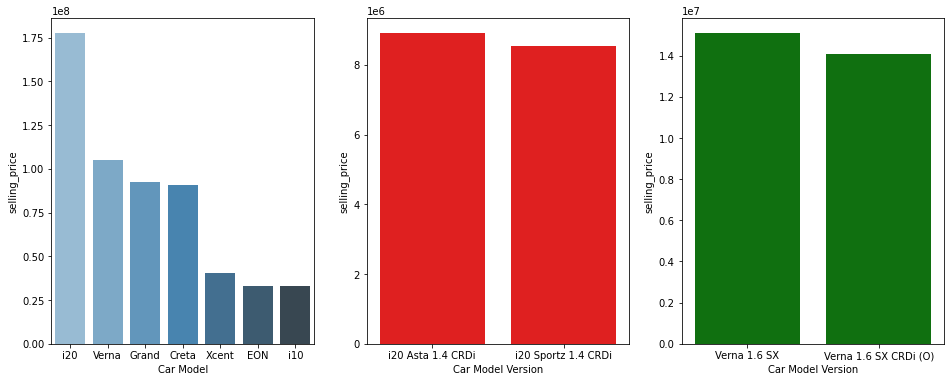

In [25]:
plt.figure(figsize = (16,6))
plt.subplot(1, 3, 1)

sns.barplot(car_new[car_new['Car Manufacturer'] == 'Hyundai'].groupby(['Car Model'])['selling_price'].sum().nlargest(7).sort_values(ascending = False).index, 
            car_new[car_new['Car Manufacturer'] == 'Hyundai'].groupby(['Car Model'])['selling_price'].sum().nlargest(7).sort_values(ascending = False), palette="Blues_d")
plt.subplot(1, 3, 2)
sns.barplot(car_new[car_new['Car Model'] == 'i20'].groupby(['Car Model Version'])['selling_price'].sum().nlargest(2).sort_values(ascending = False).index, 
            car_new[car_new['Car Model'] == 'i20'].groupby(['Car Model Version'])['selling_price'].sum().nlargest(2).sort_values(ascending = False), color = 'red' )
plt.subplot(1, 3, 3)
sns.barplot(car_new[car_new['Car Model'] == 'Verna'].groupby(['Car Model Version'])['selling_price'].sum().nlargest(2).sort_values(ascending = False).index, 
            car_new[car_new['Car Model'] == 'Verna'].groupby(['Car Model Version'])['selling_price'].sum().nlargest(2).sort_values(ascending = False), color = 'green', )
plt.show()

i20 and verna had the most selling price and the car model versions under i20 and Verna is listed out.

**Ckeck out the car models by Maruti that made the most selling price** 

C:\Users\Anita George\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Anita George\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Anita George\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


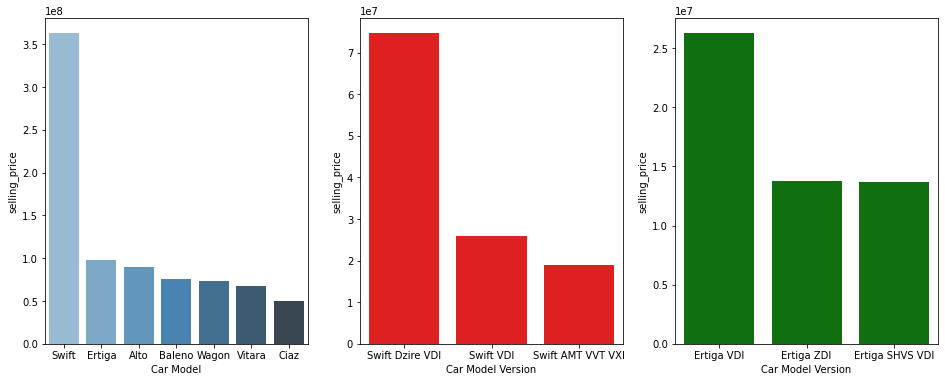

In [26]:
plt.figure(figsize = (16,6))
plt.subplot(1, 3, 1)

sns.barplot(car_new[car_new['Car Manufacturer'] == 'Maruti'].groupby(['Car Model'])['selling_price'].sum().nlargest(7).sort_values(ascending = False).index, 
            car_new[car_new['Car Manufacturer'] == 'Maruti'].groupby(['Car Model'])['selling_price'].sum().nlargest(7).sort_values(ascending = False), palette="Blues_d")
plt.subplot(1, 3, 2)
sns.barplot(car_new[car_new['Car Model'] == 'Swift'].groupby(['Car Model Version'])['selling_price'].sum().nlargest(3).sort_values(ascending = False).index, 
            car_new[car_new['Car Model'] == 'Swift'].groupby(['Car Model Version'])['selling_price'].sum().nlargest(3).sort_values(ascending = False), color = 'red' )
plt.subplot(1, 3, 3)
sns.barplot(car_new[car_new['Car Model'] == 'Ertiga'].groupby(['Car Model Version'])['selling_price'].sum().nlargest(3).sort_values(ascending = False).index, 
            car_new[car_new['Car Model'] == 'Ertiga'].groupby(['Car Model Version'])['selling_price'].sum().nlargest(3).sort_values(ascending = False), color = 'green', )
plt.show()

swift and ertiga had the most selling price and the car model versions under swift and ertiga is listed out.

**Pie chart representing the distribution of Fuel type, Seller type, Transmission and Number of Past Owners**

Text(0.5, 1.0, 'Number of Past Owners:')

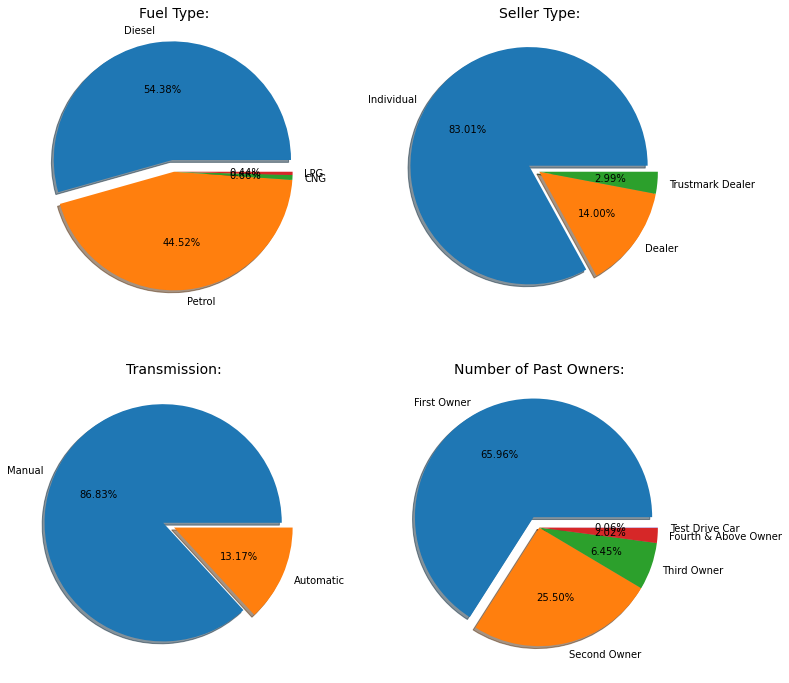

In [27]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4)) = ax

labels = car_new['fuel'].value_counts().index.tolist()
values = car_new['fuel'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0.1, 0, 0, 0])
ax1.set_title("Fuel Type:", fontdict={'fontsize': 14})

labels = car_new['seller_type'].value_counts().index.tolist()
values = car_new['seller_type'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0.1, 0, 0])
ax2.set_title("Seller Type:", fontdict={'fontsize': 14})

labels = car_new['transmission'].value_counts().index.tolist()
values = car_new['transmission'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0.1, 0])
ax3.set_title("Transmission:", fontdict={'fontsize': 14})

labels = car_new['owner'].value_counts().index.tolist()
values = car_new['owner'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0.1, 0, 0, 0, 0])
ax4.set_title("Number of Past Owners:", fontdict={'fontsize': 14})

**Check out the top car manufacturers and models that were sold which used diesel, had mileage greater than 25kmpl and engine greater than 1200 CC**

<AxesSubplot:>

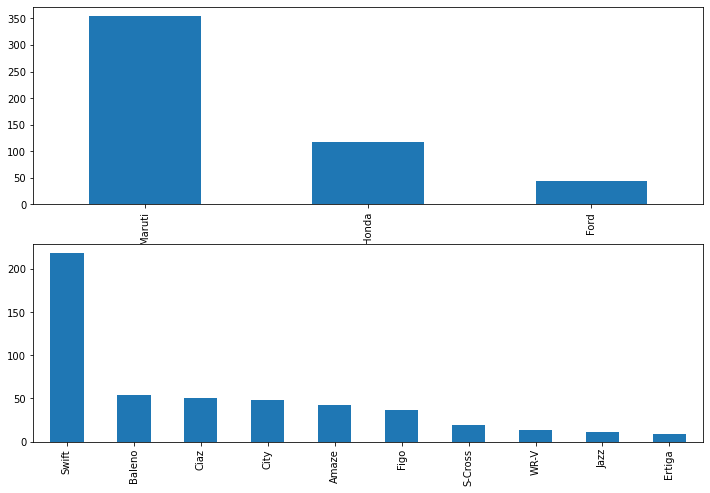

In [28]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

car_new[(car_new['fuel'] == 'Diesel') & (car_new['mileage'] > 25) & (car_new['engine'] >= 1200)]['Car Manufacturer'].value_counts().nlargest().plot.bar(
    ax=axarr[0]
)

car_new[(car_new['fuel'] == 'Diesel') & (car_new['mileage'] > 25) & (car_new['engine'] >= 1200)]['Car Model'].value_counts().nlargest(10).plot.bar(
    ax=axarr[1]
)

**Check out the top car manufacturers and models that were sold which used petrol, had mileage greater than 20kmpl and engine greater than or equal to 1000 CC**

<AxesSubplot:>

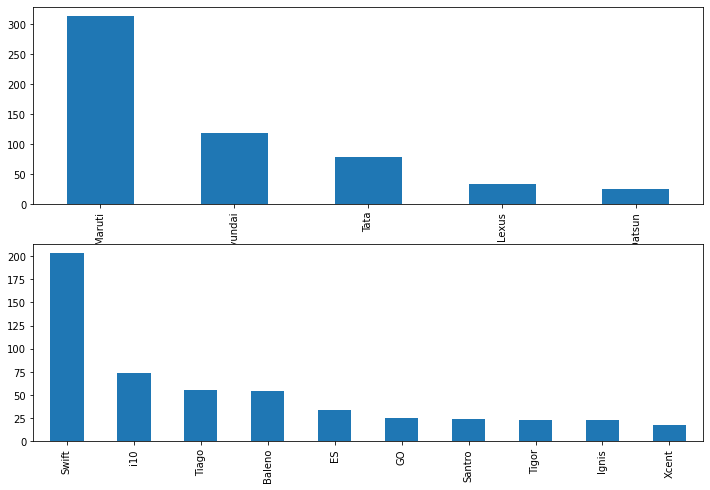

In [29]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

car_new[(car_new['fuel'] == 'Petrol') & (car_new['mileage'] > 20) & (car_new['engine'] >= 1000)]['Car Manufacturer'].value_counts().nlargest().plot.bar(
    ax=axarr[0]
)

car_new[(car_new['fuel'] == 'Petrol') & (car_new['mileage'] > 20) & (car_new['engine'] >= 1000)]['Car Model'].value_counts().nlargest(10).plot.bar(
    ax=axarr[1]
)

**Check out how mileage effects selling price based on the ownership and fuel type**

<AxesSubplot:xlabel='mileage', ylabel='selling_price'>

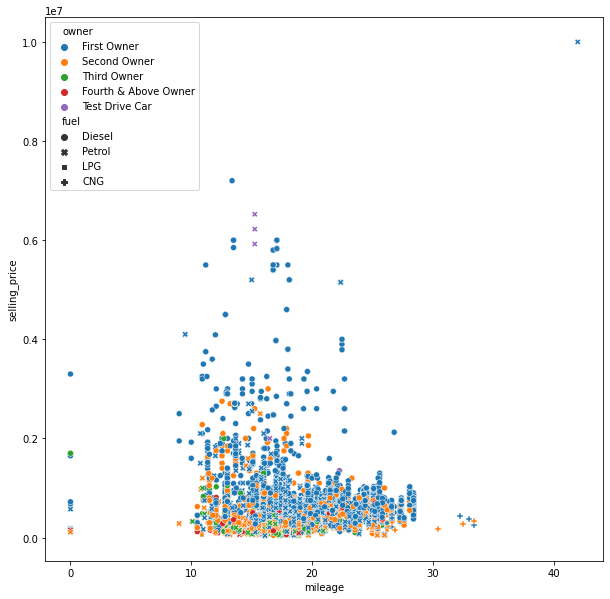

In [30]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=car_new, x="mileage", y="selling_price", hue="owner", style="fuel")

Diesel cars sold by first owner was large in number, tended to have great mileage and think selling price was more between 10 lakhs and 20 lakhs. People chose these cars over petrol because worth of money.

**Check out how km_driven effects selling price based on the ownership and fuel type**

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

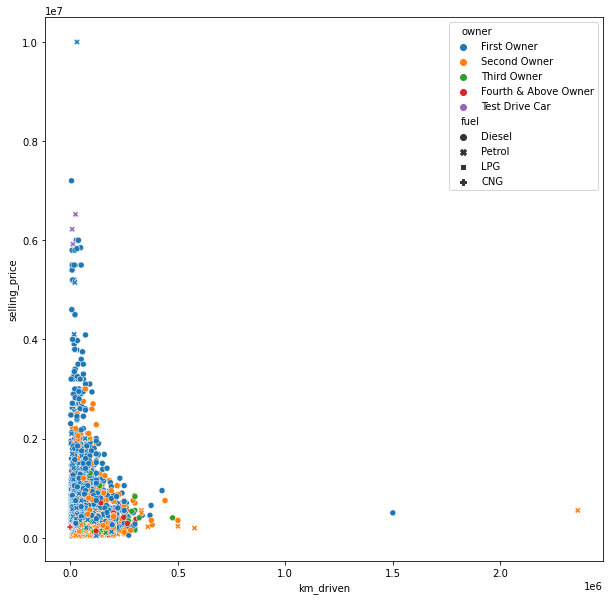

In [31]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=car_new, x="km_driven", y="selling_price", hue="owner", style="fuel")

The cars which were less driven was large in number and out of diesel-first owned cars was peferred more.

**Check out how engine effects selling price based on the ownership and fuel type**

<AxesSubplot:xlabel='engine', ylabel='selling_price'>

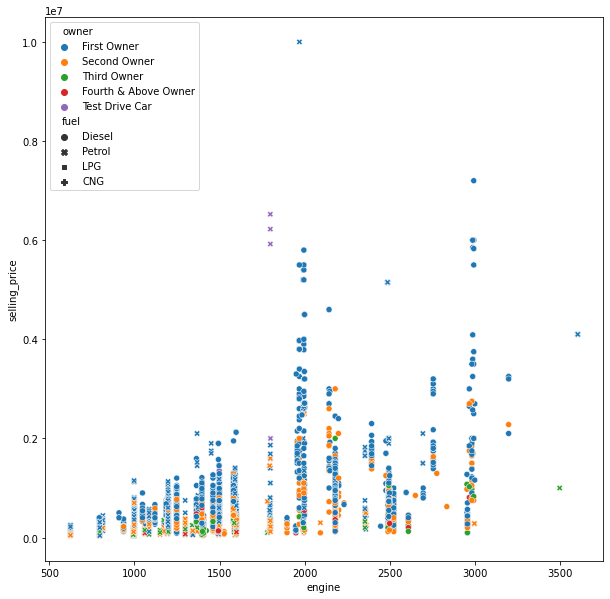

In [32]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=car_new, x="engine", y="selling_price", hue="owner", style="fuel")

Diesel cars tended to have more engine capacity was prefered more.

**Check for any correlations between variables**

<AxesSubplot:>

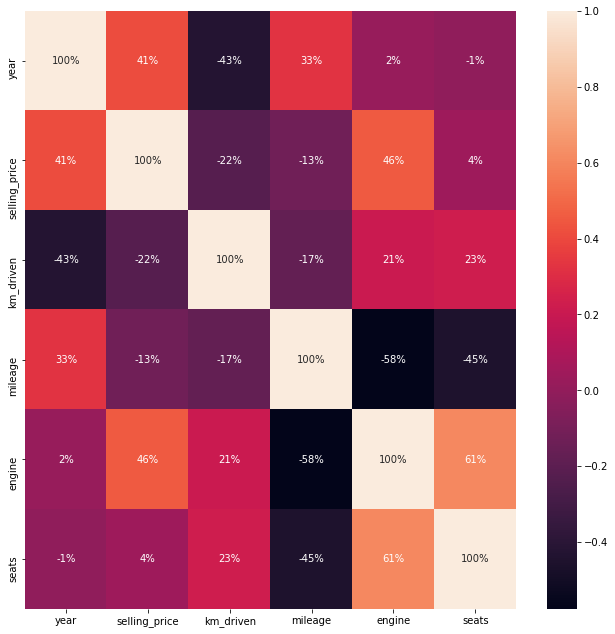

In [33]:
plt.figure(figsize=(11,11))
sns.heatmap(car_new.corr(),annot=True, fmt='.0%')

engine and year seem to have a fair influence in selling price

# Converting categorical data into numerical data

Since machine learning algorithms only take numerical values, all categorical variables are transformed into dummy variables.

Using the BinaryEncoder from the category_encoders library. Using this approach we can convert multiple categorical columns into dummy variables in a single go.

category_encoders: The category_encoders is a Python library developed under the scikit-learn-transformers library. The primary objective of this library is to convert categorical variables into quantifiable numeric variables.

In [34]:
df= car_new.drop(['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'seats'], axis = 1)

In [35]:
# importing the libraries
import category_encoders as cat_encoder
  

# creating an object BinaryEncoder
# this code calls all columns
# we can specify specific columns as well
encoder = cat_encoder.BinaryEncoder(cols = df.columns)
  
# fitting the columns to a data frame
df_category_encoder = encoder.fit_transform( df )
  
display(df_category_encoder)

C:\Users\Anita George\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,fuel_0,fuel_1,fuel_2,seller_type_0,seller_type_1,seller_type_2,transmission_0,transmission_1,owner_0,owner_1,...,Car Model Version_2,Car Model Version_3,Car Model Version_4,Car Model Version_5,Car Model Version_6,Car Model Version_7,Car Model Version_8,Car Model Version_9,Car Model Version_10,Car Model Version_11
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,1,1,0,1,0,0
8124,0,0,1,0,0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
8125,0,0,1,0,0,1,0,1,0,0,...,0,0,1,1,0,1,1,0,0,0
8126,0,0,1,0,0,1,0,1,0,0,...,1,0,1,0,1,0,0,1,0,0


In [36]:
car_new = car_new.drop([ 'fuel', 'seller_type',
       'transmission', 'owner', 'max_power', 'torque', 'Car Manufacturer', 'Car Model', 'Car Model Version'], axis = 1)
car_new = pd.merge(car_new, df_category_encoder, left_index = True, right_index = True)

In [37]:
car_new

,year,selling_price,km_driven,mileage,engine,seats,fuel_0,fuel_1,fuel_2,seller_type_0,...,Car Model Version_2,Car Model Version_3,Car Model Version_4,Car Model Version_5,Car Model Version_6,Car Model Version_7,Car Model Version_8,Car Model Version_9,Car Model Version_10,Car Model Version_11
0,2014,450000,145500,23.40,1248,5.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2014,370000,120000,21.14,1498,5.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,2006,158000,140000,17.70,1497,5.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,2010,225000,127000,23.00,1396,5.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,2007,130000,120000,16.10,1298,5.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,18.50,1197,5.0,0,1,0,0,...,0,0,1,0,1,1,0,1,0,0
8124,2007,135000,119000,16.80,1493,5.0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,1
8125,2009,382000,120000,19.30,1248,5.0,0,0,1,0,...,0,0,1,1,0,1,1,0,0,0
8126,2013,290000,25000,23.57,1396,5.0,0,0,1,0,...,1,0,1,0,1,0,0,1,0,0


# Feature Selection

In [38]:
# create x and y
#feature_cols = ['engine']
#X = car_new[feature_cols] # predictor
#y = car_new.selling_price # response

In [39]:
y = car_new['selling_price']

In [40]:
#X = car_new['engine', 'year']

In [41]:
X = car_new.drop(["selling_price"], axis = 1)

# Machine Learning : Regression (Automation) using TPOT

In [42]:
!pip install tpot

In [43]:
from tpot import TPOTRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

**Train and Test datas**

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [45]:
# We will create our TPOT regressor with commonly used arguments
tpot = TPOTRegressor(verbosity=2, scoring='r2', cv=3, 
                      n_jobs=-1, generations=6, config_dict='TPOT light',
                      population_size=50, random_state=3,
                      early_stop = 5)
# Fitting the auto ML model
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_carprediction_pipeline.py')


Generation 1 - Current best internal CV score: 0.9001926013935861

Generation 2 - Current best internal CV score: 0.9001926013935861

Generation 3 - Current best internal CV score: 0.9057496520873988

Generation 4 - Current best internal CV score: 0.9057496520873988

Generation 5 - Current best internal CV score: 0.9243282741557497

Generation 6 - Current best internal CV score: 0.9268824014594633

Best pipeline: KNeighborsRegressor(DecisionTreeRegressor(MaxAbsScaler(input_matrix), max_depth=9, min_samples_leaf=20, min_samples_split=9), n_neighbors=38, p=1, weights=distance)
0.9581048710960577


# It seems like KNeighborsRegressor predicts with the best test score